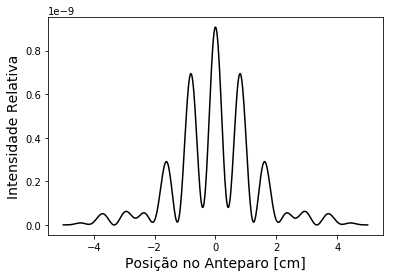

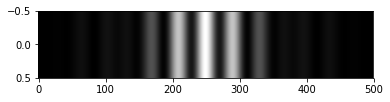

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from gaussxw import gaussxwab

########################################
#--Este programa, dado os parâmetros---#
#--abaixo, entrega uma visualização----#
#--unidimensional e bidimensional------#
#--do padrão de interferência de uma---#
#--grade de difração.------------------#
########################################

# lambd: Comprimento de onda
# f:     Distância focal
# L:     Tamanho da tela
# w:     Tamanho total da grade de difração

lambd = 500e-9      #[m]
f     = 1           #[m]
L     = 10e-2       #[m]
w     = 100e-6      #[m]

# Função de transmissão da grade de difração
def q(x):
    return np.heaviside(x - 20e-6,0) - np.heaviside(x - 40e-6,0) - np.heaviside(x + 25e-6,0) + np.heaviside(x + 35e-6,0)

#################################################
#--O padrão de interferência é a Transformada---#
#--de Fourier da raiz da função de transmissão--#
#-----------------------------------------------#
#--Para otimizar a função, os parâmetros para---#
#--a integração por quadratura gaussiana foram--#
#--calculados fora da função e entregues como --#
#--argumentos.----------------------------------#
#################################################

def I_patt(x,lambd,f,w,u,p):
    i = complex(0,1)
    s = 0.0
    for k in range(n):
        s += p[k]*np.sqrt(q(u[k]))*np.exp(i*2*np.pi*x*u[k]/(lambd*f))
    return abs(s)**2

n   = 500
u,p = gaussxwab(n, -w/2, w/2)

x = np.linspace(-L/2, L/2, 500)
I = I_patt(x,lambd,f,w,u,p)

plt.plot(x*1e2, I, '-k')
plt.xlabel('Posição no Anteparo [cm]', size = 14)
plt.ylabel('Intensidade Relativa', size = 14)

plt.savefig('im_5_19d1', dpi = 300)
plt.show()

plt.imshow((I,), aspect = 4*len(x)/20, cmap='gray', interpolation = 'gaussian')

plt.savefig('im_5_19d1', dpi = 300)
plt.show()